Poniżej znajduje się przykładowe razwiąznie zagadnienia:

$$ \nabla \cdot v = 0 $$

$$ v_t +  v \nabla v - \nu \nabla \cdot  \left( \frac{b}{\omega} \nabla v  \right) = - \nabla p $$

$$ \omega_t + \alpha_1 \nabla \cdot  ( \omega v ) - \kappa_1 \nabla \cdot  \left( \frac{b}{\omega} \nabla \omega  \right) = - \kappa_2 \omega^2 $$

$$ b_t + \alpha_2 \nabla \cdot  ( bv ) - \kappa_3 \nabla \cdot  \left( \frac{b}{\omega} \nabla b  \right) = - \alpha_3 b \omega + \kappa_4 \frac{b}{\omega} \left| D(v) \right|^2 $$

$$ v = 0~~~~\text{na } \partial \Omega $$

$$ \nabla \omega \cdot n = 0~~~~\text{na } \partial \Omega $$

$$ \nabla b \cdot n = 0~~~~\text{na } \partial \Omega $$

In [1]:
from siatka import Siatka
from brzeg import Brzeg_protokat, Brzeg_1D
from boundary_point import Boundary_point
from solver import Solver

In [2]:
import numpy as np

# elementy wewnatrz 

funk_v= [
        lambda x,y,t: 0,  # brzeg 1 - prawy
        lambda x,y,t: 0,  # brzeg 2 - gora
        lambda x,y,t: 0,  # brzeg 3 - lewy
        lambda x,y,t: 0,  # brzeg 4 - dol
]

funk_u= [
        lambda x,y,t: 0,  # brzeg 1 - prawy
        lambda x,y,t: 0,  # brzeg 2 - gora
        lambda x,y,t: 0,  # brzeg 3 - lewy
        lambda x,y,t: 0,  # brzeg 4 - dol
]

b1 = Brzeg_protokat(0.4,0.6,0.4,0.6,funk_v,funk_u)

b2 = Brzeg_protokat(0.4,0.6,0.8,1.0,funk_v,funk_u)

b3 = Brzeg_protokat(0.0,0.2,0.4,0.6,funk_v,funk_u)

b4 = Brzeg_protokat(0.8,1.0,0.4,0.6,funk_v,funk_u)

b5 = Brzeg_protokat(0.4,0.6,0.0,0.2,funk_v,funk_u)

brzeg = [b1,b2,b3,b4,b5]
#brzeg = []

# brzeg zewnetrzny 1 obszaru - prawy
funk_v0 = lambda x,y,t: 0 #1 - np.exp(-t)
funk_u0 = lambda x,y,t: 0

b1 = Brzeg_1D(1,1,0,1,funk_v0,funk_u0)

# brzeg zewnetrzny 2 obszaru - gora
funk_v0 = lambda x,y,t: 0
funk_u0 = lambda x,y,t: 0

b2 = Brzeg_1D(0,1,1,1,funk_v0,funk_u0)

# brzeg zewnetrzny 3 obszaru - lewy
funk_v0 = lambda x,y,t: 0 #1 - np.exp(-t)
funk_u0 = lambda x,y,t: 0

b3 = Brzeg_1D(0,0,0,1,funk_v0,funk_u0)

# brzeg zewnetrzny 4 obszaru - dol
funk_v0 = lambda x,y,t: 0
funk_u0 = lambda x,y,t: 0

b4 = Brzeg_1D(0,1,0,0,funk_v0,funk_u0)

bounds = [b1,b2,b3,b4]

# warunki poczatkowe - v,u

v_0 = lambda x,y: 0
u_0 = lambda x,y: 0

# sila zewnetrzna f

#fx = lambda x,y,t: -np.sin(np.arctan2(y-0.5,x-0.5))*10
#fy = lambda x,y,t:  np.cos(np.arctan2(y-0.5,x-0.5))*10

r = 0.3
fx = lambda x,y,t: -np.sin(np.arctan2(y-0.5,x-0.5)) * ( (x-0.5)*(x-0.5)+(y-0.5)*(y-0.5) >= r*r ) * 15
fy = lambda x,y,t:  np.cos(np.arctan2(y-0.5,x-0.5)) * ( (x-0.5)*(x-0.5)+(y-0.5)*(y-0.5) >= r*r ) * 15


# warunek pocztkowy

wsp = 40
omega0 = lambda x,y: 0.01*(np.sin(
    (wsp*(x-0.5)*(x-0.5)+wsp*(y-0.5)*(y-0.5))
    )*( (x-0.5)*(x-0.5)+(y-0.5)*(y-0.5) >= 25 * np.pi * np.pi / wsp / wsp )*( (x-0.5)*(x-0.5)+(y-0.5)*(y-0.5) <= 36 * np.pi * np.pi / wsp / wsp )
                           + 2.1)
b0 = lambda x,y: 0.01*(np.sin(
    (wsp*(x-0.5)*(x-0.5)+wsp*(y-0.5)*(y-0.5))
    )*( (x-0.5)*(x-0.5)+(y-0.5)*(y-0.5) >= 25 * np.pi * np.pi / wsp / wsp )*( (x-0.5)*(x-0.5)+(y-0.5)*(y-0.5) <= 36 * np.pi * np.pi / wsp / wsp )
                           + 2.1)
#omega0 = lambda x,y: 0.1
#b0     = lambda x,y: 0.1

options = {'kappa1': 1.0, 'kappa2': 0.001, 'kappa3': 1, 'kappa4': 1,
           'alpha1': 3.0, 'alpha2': 1,     'alpha3': 1,
           'nu': 0.6, 'beta': 0.0, 'delta': 0.007}

siatka = Siatka(1, 1, 1/100, brzeg,bounds)
#          dt,      siatka, v_0, u_0, omega0, b0, fx, fy, options
s = Solver(0.00001, siatka, v_0, u_0, omega0, b0, fx, fy, options)

Rozpoczynam zapis siatki...
Wykonane
Rozpoczynam inicjalizacje predkosci...
Wykonane
Rozpoczynam inicjalizacje cisnienia...
Wykonane
Rozpoczynam inicjalizacje omega...
Wykonane
Rozpoczynam inicjalizacje b...
Wykonane
Rozpoczynam inicjalizacje sily zewnetrzej...
Wykonane


In [3]:
d = dict(INNER=s.siatka.inner_points, X=s.siatka.X, Y=s.siatka.Y )
np.savez("siatka", **d )

In [4]:
s.solve(0.2501, 0.0001, 0.001, "solK2Legit3")

Czas 0.0001.....Dodano
Czas 0.0002.....Dodano
Czas 0.0003.....Dodano
Czas 0.0004.....Dodano
Czas 0.0005.....Dodano
Czas 0.0006.....Dodano
Czas 0.0007.....Dodano
Czas 0.0008.....Dodano
Czas 0.0009.....Dodano
Czas 0.001.....Dodano
Czas:0.001 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0011.....Dodano
Czas 0.0012.....Dodano
Czas 0.0013.....Dodano
Czas 0.0014.....Dodano
Czas 0.0015.....Dodano
Czas 0.0016.....Dodano
Czas 0.0017.....Dodano
Czas 0.0018.....Dodano
Czas 0.0019.....Dodano
Czas 0.002.....Dodano
Czas:0.002 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0021.....Dodano
Czas 0.0022.....Dodano
Czas 0.0023.....Dodano
Czas 0.0024.....Dodano
Czas 0.0025.....Dodano
Czas 0.0026.....Dodano
Czas 0.0027.....Dodano
Czas 0.0028.....Dodano
Czas 0.0029.....Dodano
Czas 0.003.....Dodano
Czas:0.003 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0031.....Dodano
Czas 0.0032.....Dodano
Czas 0.0033.....Dodano
Czas 0.0034.....Dodano
Czas 0.0035.....Dodano
Czas 0.0036.....Do

Czas 0.0286.....Dodano
Czas 0.0287.....Dodano
Czas 0.0288.....Dodano
Czas 0.0289.....Dodano
Czas 0.029.....Dodano
Czas:0.029 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0291.....Dodano
Czas 0.0292.....Dodano
Czas 0.0293.....Dodano
Czas 0.0294.....Dodano
Czas 0.0295.....Dodano
Czas 0.0296.....Dodano
Czas 0.0297.....Dodano
Czas 0.0298.....Dodano
Czas 0.0299.....Dodano
Czas 0.03.....Dodano
Czas:0.03 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0301.....Dodano
Czas 0.0302.....Dodano
Czas 0.0303.....Dodano
Czas 0.0304.....Dodano
Czas 0.0305.....Dodano
Czas 0.0306.....Dodano
Czas 0.0307.....Dodano
Czas 0.0308.....Dodano
Czas 0.0309.....Dodano
Czas 0.031.....Dodano
Czas:0.031 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0311.....Dodano
Czas 0.0312.....Dodano
Czas 0.0313.....Dodano
Czas 0.0314.....Dodano
Czas 0.0315.....Dodano
Czas 0.0316.....Dodano
Czas 0.0317.....Dodano
Czas 0.0318.....Dodano
Czas 0.0319.....Dodano
Czas 0.032.....Dodano
Czas:0.032 - zapisano

Czas:0.057 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0571.....Dodano
Czas 0.0572.....Dodano
Czas 0.0573.....Dodano
Czas 0.0574.....Dodano
Czas 0.0575.....Dodano
Czas 0.0576.....Dodano
Czas 0.0577.....Dodano
Czas 0.0578.....Dodano
Czas 0.0579.....Dodano
Czas 0.058.....Dodano
Czas:0.058 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0581.....Dodano
Czas 0.0582.....Dodano
Czas 0.0583.....Dodano
Czas 0.0584.....Dodano
Czas 0.0585.....Dodano
Czas 0.0586.....Dodano
Czas 0.0587.....Dodano
Czas 0.0588.....Dodano
Czas 0.0589.....Dodano
Czas 0.059.....Dodano
Czas:0.059 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0591.....Dodano
Czas 0.0592.....Dodano
Czas 0.0593.....Dodano
Czas 0.0594.....Dodano
Czas 0.0595.....Dodano
Czas 0.0596.....Dodano
Czas 0.0597.....Dodano
Czas 0.0598.....Dodano
Czas 0.0599.....Dodano
Czas 0.06.....Dodano
Czas:0.06 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0601.....Dodano
Czas 0.0602.....Dodano
Czas 0.0603.....Dodano
Czas 0

Czas 0.0854.....Dodano
Czas 0.0855.....Dodano
Czas 0.0856.....Dodano
Czas 0.0857.....Dodano
Czas 0.0858.....Dodano
Czas 0.0859.....Dodano
Czas 0.086.....Dodano
Czas:0.086 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0861.....Dodano
Czas 0.0862.....Dodano
Czas 0.0863.....Dodano
Czas 0.0864.....Dodano
Czas 0.0865.....Dodano
Czas 0.0866.....Dodano
Czas 0.0867.....Dodano
Czas 0.0868.....Dodano
Czas 0.0869.....Dodano
Czas 0.087.....Dodano
Czas:0.087 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0871.....Dodano
Czas 0.0872.....Dodano
Czas 0.0873.....Dodano
Czas 0.0874.....Dodano
Czas 0.0875.....Dodano
Czas 0.0876.....Dodano
Czas 0.0877.....Dodano
Czas 0.0878.....Dodano
Czas 0.0879.....Dodano
Czas 0.088.....Dodano
Czas:0.088 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.0881.....Dodano
Czas 0.0882.....Dodano
Czas 0.0883.....Dodano
Czas 0.0884.....Dodano
Czas 0.0885.....Dodano
Czas 0.0886.....Dodano
Czas 0.0887.....Dodano
Czas 0.0888.....Dodano
Czas 0.0889.....Do

Czas 0.1139.....Dodano
Czas 0.114.....Dodano
Czas:0.114 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.1141.....Dodano
Czas 0.1142.....Dodano
Czas 0.1143.....Dodano
Czas 0.1144.....Dodano
Czas 0.1145.....Dodano
Czas 0.1146.....Dodano
Czas 0.1147.....Dodano
Czas 0.1148.....Dodano
Czas 0.1149.....Dodano
Czas 0.115.....Dodano
Czas:0.115 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.1151.....Dodano
Czas 0.1152.....Dodano
Czas 0.1153.....Dodano
Czas 0.1154.....Dodano
Czas 0.1155.....Dodano
Czas 0.1156.....Dodano
Czas 0.1157.....Dodano
Czas 0.1158.....Dodano
Czas 0.1159.....Dodano
Czas 0.116.....Dodano
Czas:0.116 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.1161.....Dodano
Czas 0.1162.....Dodano
Czas 0.1163.....Dodano
Czas 0.1164.....Dodano
Czas 0.1165.....Dodano
Czas 0.1166.....Dodano
Czas 0.1167.....Dodano
Czas 0.1168.....Dodano
Czas 0.1169.....Dodano
Czas 0.117.....Dodano
Czas:0.117 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.1171.....Dodano
Czas 

Czas 0.1422.....Dodano
Czas 0.1423.....Dodano
Czas 0.1424.....Dodano
Czas 0.1425.....Dodano
Czas 0.1426.....Dodano
Czas 0.1427.....Dodano
Czas 0.1428.....Dodano
Czas 0.1429.....Dodano
Czas 0.143.....Dodano
Czas:0.143 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.1431.....Dodano
Czas 0.1432.....Dodano
Czas 0.1433.....Dodano
Czas 0.1434.....Dodano
Czas 0.1435.....Dodano
Czas 0.1436.....Dodano
Czas 0.1437.....Dodano
Czas 0.1438.....Dodano
Czas 0.1439.....Dodano
Czas 0.144.....Dodano
Czas:0.144 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.1441.....Dodano
Czas 0.1442.....Dodano
Czas 0.1443.....Dodano
Czas 0.1444.....Dodano
Czas 0.1445.....Dodano
Czas 0.1446.....Dodano
Czas 0.1447.....Dodano
Czas 0.1448.....Dodano
Czas 0.1449.....Dodano
Czas 0.145.....Dodano
Czas:0.145 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.1451.....Dodano
Czas 0.1452.....Dodano
Czas 0.1453.....Dodano
Czas 0.1454.....Dodano
Czas 0.1455.....Dodano
Czas 0.1456.....Dodano
Czas 0.1457.....Do

Czas 0.1707.....Dodano
Czas 0.1708.....Dodano
Czas 0.1709.....Dodano
Czas 0.171.....Dodano
Czas:0.171 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.1711.....Dodano
Czas 0.1712.....Dodano
Czas 0.1713.....Dodano
Czas 0.1714.....Dodano
Czas 0.1715.....Dodano
Czas 0.1716.....Dodano
Czas 0.1717.....Dodano
Czas 0.1718.....Dodano
Czas 0.1719.....Dodano
Czas 0.172.....Dodano
Czas:0.172 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.1721.....Dodano
Czas 0.1722.....Dodano
Czas 0.1723.....Dodano
Czas 0.1724.....Dodano
Czas 0.1725.....Dodano
Czas 0.1726.....Dodano
Czas 0.1727.....Dodano
Czas 0.1728.....Dodano
Czas 0.1729.....Dodano
Czas 0.173.....Dodano
Czas:0.173 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.1731.....Dodano
Czas 0.1732.....Dodano
Czas 0.1733.....Dodano
Czas 0.1734.....Dodano
Czas 0.1735.....Dodano
Czas 0.1736.....Dodano
Czas 0.1737.....Dodano
Czas 0.1738.....Dodano
Czas 0.1739.....Dodano
Czas 0.174.....Dodano
Czas:0.174 - zapisano rozwiazanie do pliku

Czas 0.1991.....Dodano
Czas 0.1992.....Dodano
Czas 0.1993.....Dodano
Czas 0.1994.....Dodano
Czas 0.1995.....Dodano
Czas 0.1996.....Dodano
Czas 0.1997.....Dodano
Czas 0.1998.....Dodano
Czas 0.1999.....Dodano
Czas 0.2.....Dodano
Czas:0.2 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.2001.....Dodano
Czas 0.2002.....Dodano
Czas 0.2003.....Dodano
Czas 0.2004.....Dodano
Czas 0.2005.....Dodano
Czas 0.2006.....Dodano
Czas 0.2007.....Dodano
Czas 0.2008.....Dodano
Czas 0.2009.....Dodano
Czas 0.201.....Dodano
Czas:0.201 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.2011.....Dodano
Czas 0.2012.....Dodano
Czas 0.2013.....Dodano
Czas 0.2014.....Dodano
Czas 0.2015.....Dodano
Czas 0.2016.....Dodano
Czas 0.2017.....Dodano
Czas 0.2018.....Dodano
Czas 0.2019.....Dodano
Czas 0.202.....Dodano
Czas:0.202 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.2021.....Dodano
Czas 0.2022.....Dodano
Czas 0.2023.....Dodano
Czas 0.2024.....Dodano
Czas 0.2025.....Dodano
Czas 0.2026.....Dodano

Czas 0.2276.....Dodano
Czas 0.2277.....Dodano
Czas 0.2278.....Dodano
Czas 0.2279.....Dodano
Czas 0.228.....Dodano
Czas:0.228 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.2281.....Dodano
Czas 0.2282.....Dodano
Czas 0.2283.....Dodano
Czas 0.2284.....Dodano
Czas 0.2285.....Dodano
Czas 0.2286.....Dodano
Czas 0.2287.....Dodano
Czas 0.2288.....Dodano
Czas 0.2289.....Dodano
Czas 0.229.....Dodano
Czas:0.229 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.2291.....Dodano
Czas 0.2292.....Dodano
Czas 0.2293.....Dodano
Czas 0.2294.....Dodano
Czas 0.2295.....Dodano
Czas 0.2296.....Dodano
Czas 0.2297.....Dodano
Czas 0.2298.....Dodano
Czas 0.2299.....Dodano
Czas 0.23.....Dodano
Czas:0.23 - zapisano rozwiazanie do pliku: solK2Legit3.npz
Czas 0.2301.....Dodano
Czas 0.2302.....Dodano
Czas 0.2303.....Dodano
Czas 0.2304.....Dodano
Czas 0.2305.....Dodano
Czas 0.2306.....Dodano
Czas 0.2307.....Dodano
Czas 0.2308.....Dodano
Czas 0.2309.....Dodano
Czas 0.231.....Dodano
Czas:0.231 - zapisano

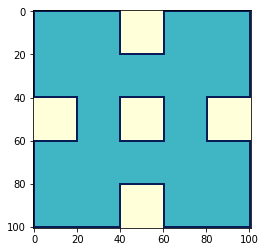

In [5]:
import matplotlib.pyplot as plt
fig = plt.imshow(s.siatka.inner_points, cmap='YlGnBu', interpolation='nearest')
plt.show()
fig.figure.savefig("geometryK2D.png")

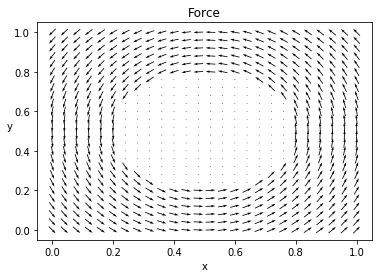

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

np.seterr(divide='ignore', invalid='ignore')

# quiver
XX = s.siatka.X
YY = s.siatka.Y
X, Y = np.meshgrid(XX, YY)
V = fx(X,Y,0)
U = fy(X,Y,0)

k = 4

plt.figure()
plt.title('Force')
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.quiver(X[::k, ::k], Y[::k, ::k], V[::k, ::k], U[::k, ::k],pivot='mid', units='inches')

plt.subplots_adjust(hspace = 0.5,wspace = 0.05)

plt.savefig('f1.pdf')
plt.show()

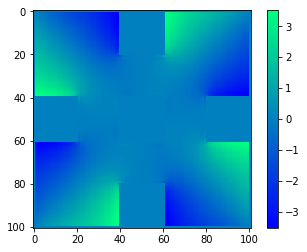

In [7]:
for ix in range(s.siatka.X.size):
    for iy in range(s.siatka.Y.size):
        if s.siatka.inner_points[iy,ix] == 0 or s.siatka.inner_points[iy,ix] == 2:
            s.p[iy,ix] = 0

import matplotlib.pyplot as plt
import numpy as np


fig = plt.imshow(s.p, cmap='winter', interpolation='nearest')
plt.colorbar(fig)
plt.show()
fig.figure.savefig("pressureK2D.png")


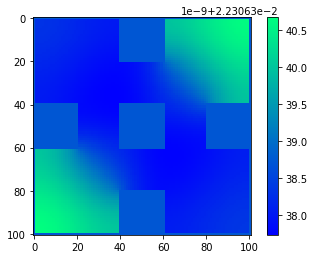

In [8]:
# normalizacja pod wykres
ile = 0 
suma = 0
for ix in range(s.siatka.X.size):
    for iy in range(s.siatka.Y.size):
        if s.siatka.inner_points[iy,ix] == 1:
            suma += s.omega[iy,ix]
            ile  += 1
srednia = suma/ile
            
for ix in range(s.siatka.X.size):
    for iy in range(s.siatka.Y.size):
        if s.siatka.inner_points[iy,ix] == 0 or s.siatka.inner_points[iy,ix] == 2:
            s.omega[iy,ix] = srednia


import matplotlib.pyplot as plt

fig = plt.imshow(s.omega, cmap='winter', interpolation='nearest')
plt.colorbar(fig)
plt.show()
fig.figure.savefig("omegaK2D.png")

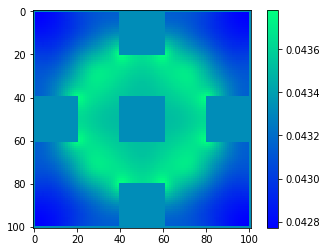

In [9]:
# normalizacja pod wykres
ile = 0 
suma = 0
for ix in range(s.siatka.X.size):
    for iy in range(s.siatka.Y.size):
        if s.siatka.inner_points[iy,ix] == 1:
            suma += s.b[iy,ix]
            ile  += 1
srednia = suma/ile
            
for ix in range(s.siatka.X.size):
    for iy in range(s.siatka.Y.size):
        if s.siatka.inner_points[iy,ix] == 0 or s.siatka.inner_points[iy,ix] == 2:
            s.b[iy,ix] = srednia
            

fig = plt.imshow(s.b, cmap='winter', interpolation='nearest')
plt.colorbar(fig)
plt.show()
fig.figure.savefig("bK2D.png")

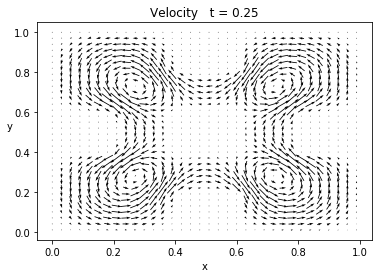

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

np.seterr(divide='ignore', invalid='ignore')

# quiver
XX = s.siatka.X
YY = s.siatka.Y
X, Y = np.meshgrid(XX, YY)
V = s.v 
U = s.u

k = 3

plt.figure()
plt.title('Velocity   t = ' + str(round(s.t,3)))
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.quiver(X[::k, ::k], Y[::k, ::k], V[::k, ::k], U[::k, ::k],pivot='mid', units='inches')

plt.subplots_adjust(hspace = 0.5,wspace = 0.05)

plt.savefig('velocityK2D.pdf')
plt.show()